<a href="https://colab.research.google.com/github/ParsaKeerthana/Dimensionality_reduction_techniques-/blob/main/1)_Write_a_colab_for_dimensionality_reduction_techniques_for_various_data_setsb).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


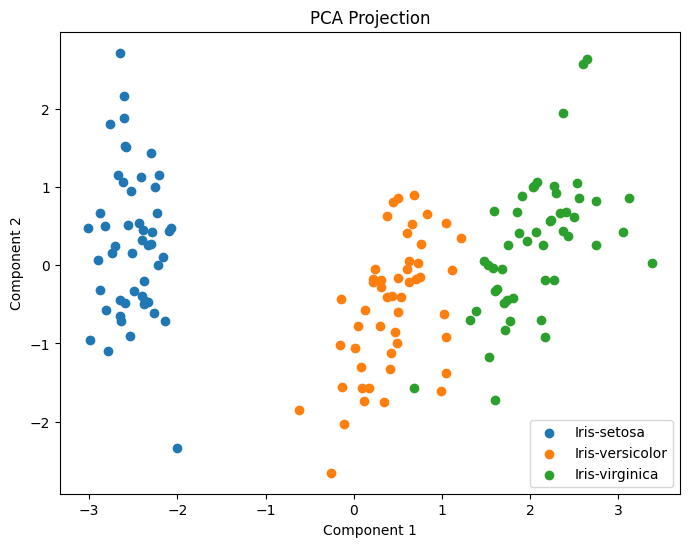

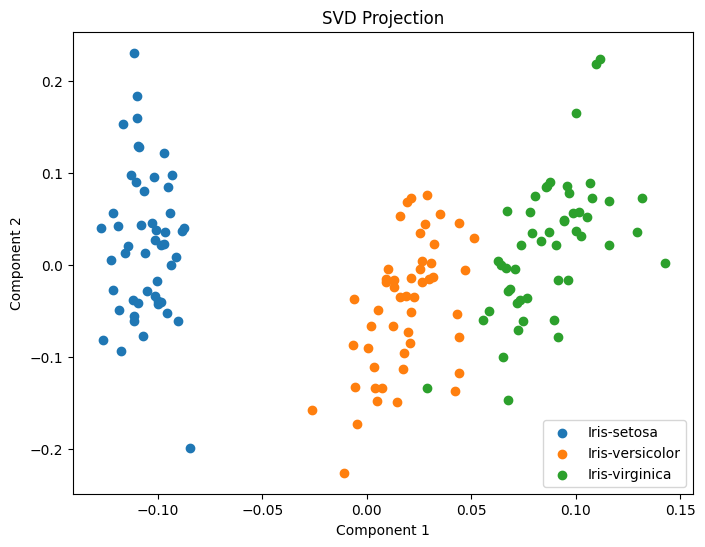

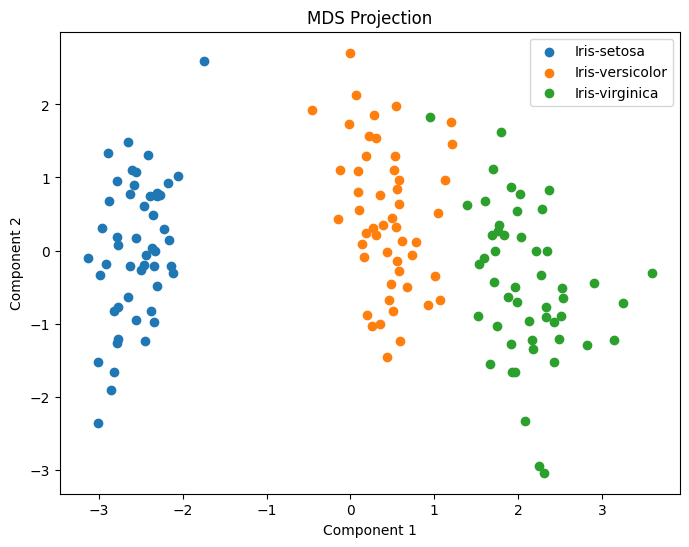

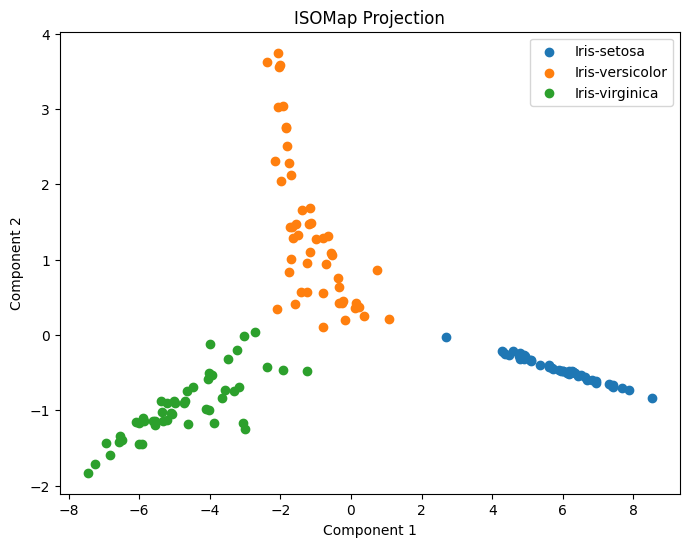

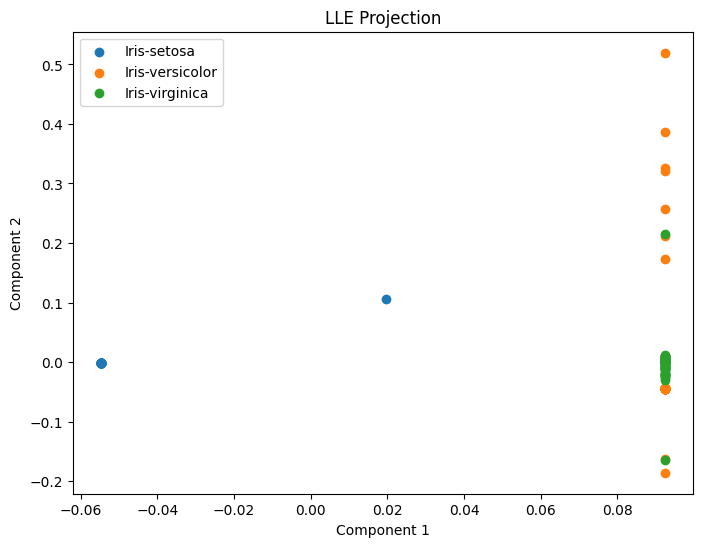

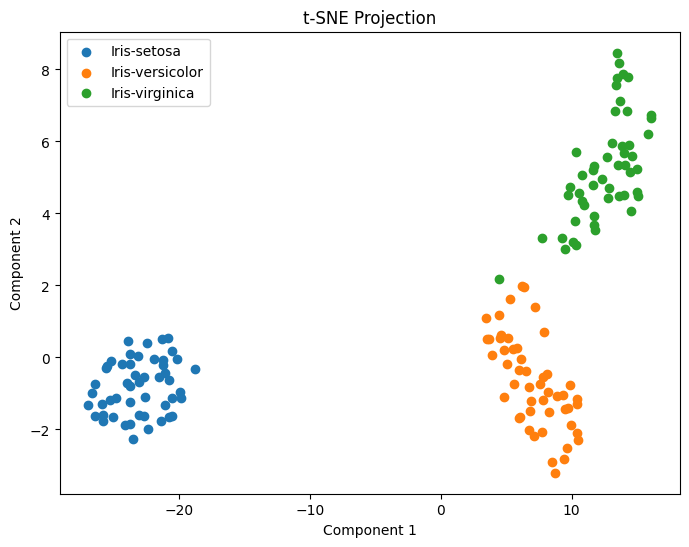

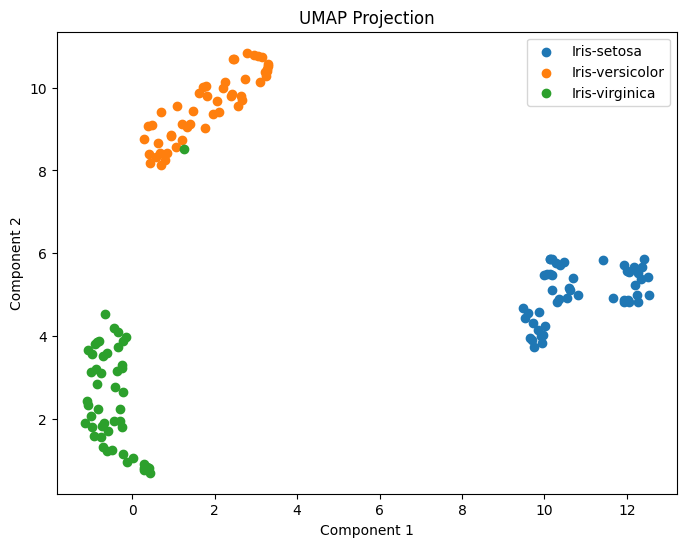

In [7]:
# Install UMAP
!pip install umap-learn

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS, Isomap, LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler
import pandas as pd
import umap

# Load the dataset
file_path = 'Iris.csv'  # Adjust the file path as needed
iris = pd.read_csv(file_path)

# Assuming the last column is the target and the rest are features
X = iris.iloc[:, :-1]  # All rows, all columns except the last
y = iris.iloc[:, -1]   # All rows, just the last column

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function for plotting
def plot_embedding(X, y, title):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(y)
    for label in unique_labels:
        indices = y == label
        plt.scatter(X[indices, 0], X[indices, 1], label=label)
    plt.legend()
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plot_embedding(X_pca, y, "PCA Projection")

# SVD
U, S, VT = np.linalg.svd(X_scaled)
X_svd = U[:, :2]
plot_embedding(X_svd, y, "SVD Projection")

# MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)
plot_embedding(X_mds, y, "MDS Projection")

# ISOMap
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)
plot_embedding(X_isomap, y, "ISOMap Projection")

# LLE
lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(X_scaled)
plot_embedding(X_lle, y, "LLE Projection")

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plot_embedding(X_tsne, y, "t-SNE Projection")

# UMAP
umap_model = umap.UMAP(n_components=2)
X_umap = umap_model.fit_transform(X_scaled)
plot_embedding(X_umap, y, "UMAP Projection")

plt.show()
